In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

%cd gdrive/MyDrive/DS203_Assignments/Assignment5/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/DS203_Assignments/Assignment5


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# **Q1**

## **a) Prelimaries**

i. Reading data into a dataframe

ii. Displaying a portion of dataframe

In [3]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Correcting columns

In [4]:
df[' gdp_for_year ($) '].replace(',','', regex=True, inplace=True)
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '])

iii. printing total no of records

iv. printing total no of variables

In [5]:
print("No of variables: ",len(df.count(axis=0)))
print("No of records: ",len(df.count(axis=1)))

No of variables:  12
No of records:  27820


v. Datatype of each variable

In [6]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

vi. No of unique values for each variable

In [7]:
for data in df.columns:
  print(data,":",len(pd.unique(df[data])))

country : 101
year : 32
sex : 2
age : 6
suicides_no : 2084
population : 25564
suicides/100k pop : 5298
country-year : 2321
HDI for year : 306
 gdp_for_year ($)  : 2321
gdp_per_capita ($) : 2233
generation : 6


vii. Type of each variable

In [8]:
print("country : nominal")
print("year : temporal")
print("sex : nominal")
print("age : ordinal")
print("suicides_no : integer")
print("population : integer")
print("suicides/100k pop : continuous")
print("country-year : nominal")
print("HDI for year : continuous")
print("gdp_for_year : integer")
print("gdp_per_capita : continuous")
print("generation : nominal")

discrete_variables=["country","sex","age","generation"]
continuous_variables=["suicides_no","suicides/100k pop","population"," gdp_for_year ($) ","gdp_per_capita ($)","HDI for year"]

country : nominal
year : temporal
sex : nominal
age : ordinal
suicides_no : integer
population : integer
suicides/100k pop : continuous
country-year : nominal
HDI for year : continuous
gdp_for_year : integer
gdp_per_capita : continuous
generation : nominal


viii. No of missing entries for each variable

In [9]:
for i in df.columns:
  print(i,":",df[i].isnull().sum())

country : 0
year : 0
sex : 0
age : 0
suicides_no : 0
population : 0
suicides/100k pop : 0
country-year : 0
HDI for year : 19456
 gdp_for_year ($)  : 0
gdp_per_capita ($) : 0
generation : 0


ix. No of records with no missing entries

In [10]:
print("No of records with no missing entries:",df.notnull().all(axis=1).sum())

No of records with no missing entries: 8364


## **b) Discrete**

i. frequency of each unique variable

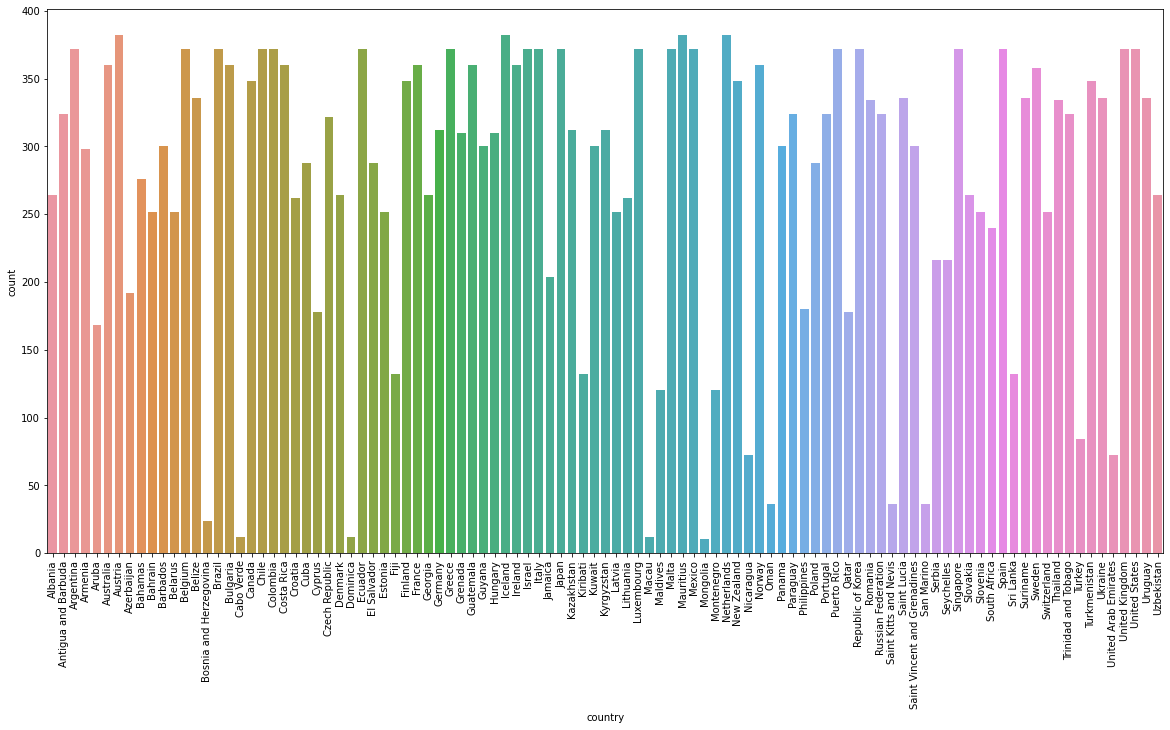

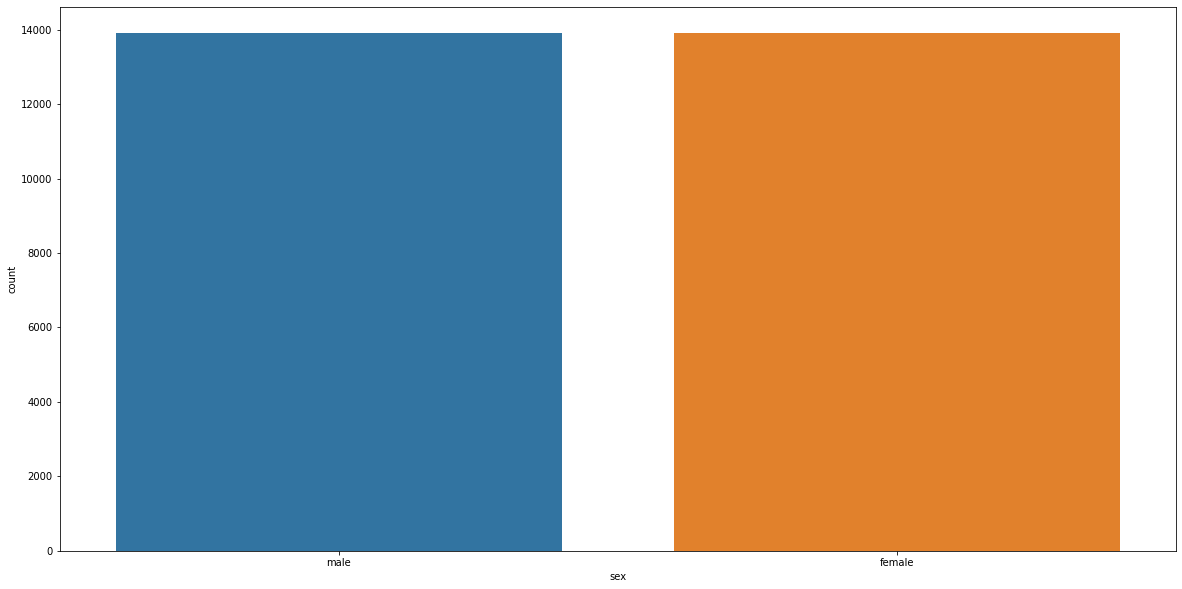

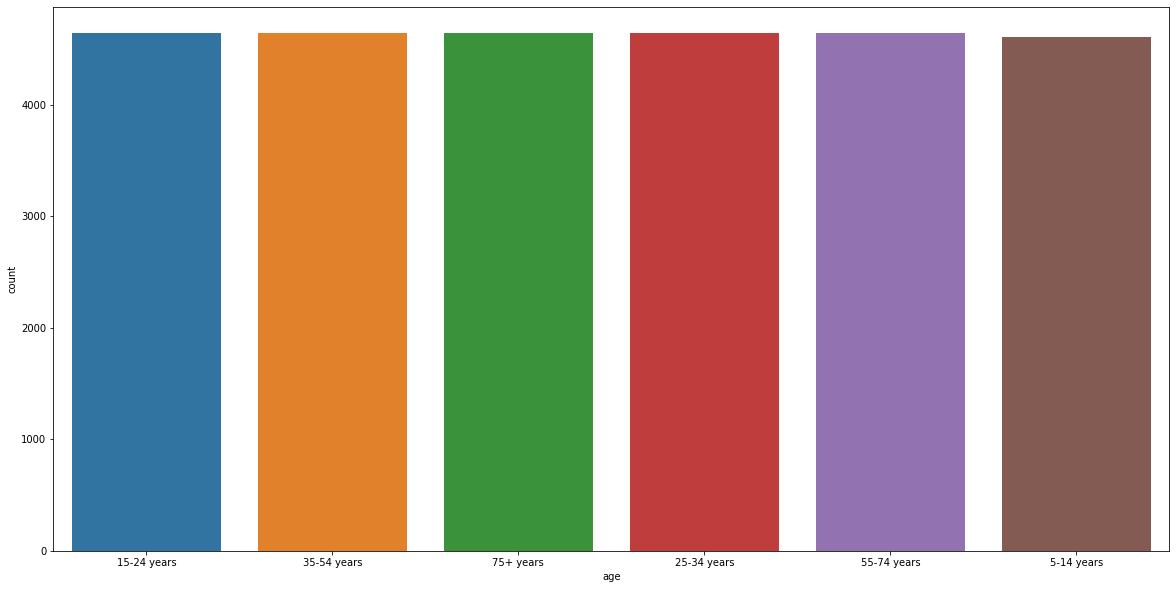

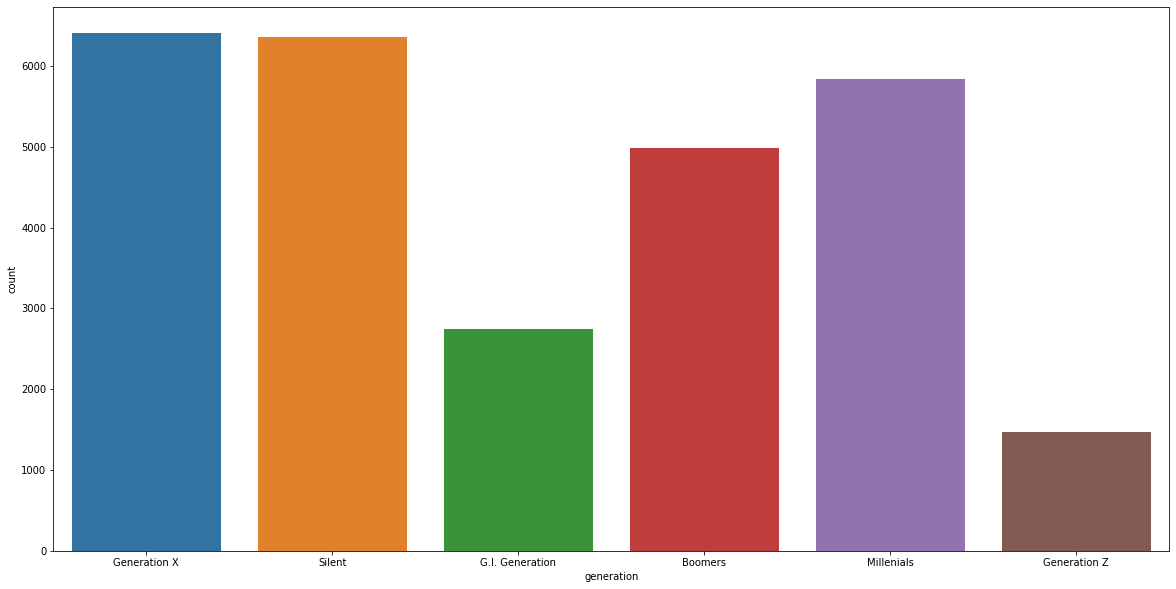

In [11]:
for i in discrete_variables:
  plt.figure(figsize=(20,10))
  hist = sns.countplot(data=df,x=i) 
  if (i=="country"): #because there are 100+ labels for countries which makes the histogram very clutersome if names are horizontally written
    plt.xticks(rotation=90)
  plt.show()

ii. Mode of each variable

In [12]:
for i in discrete_variables:
  print("Mode of",i,":",df[i].mode()[0])

Mode of country : Austria
Mode of sex : female
Mode of age : 15-24 years
Mode of generation : Generation X


iii. Entropy of each variable


In [13]:
def entropy(column):
  temp = pd.Series(column).value_counts(normalize=True, sort=False)
  return -(temp * np.log(temp)).sum()

for i in discrete_variables:
  print("Entropy of",i,":",entropy(df[i]))

Entropy of country : 4.512115046503917
Entropy of sex : 0.6931471805599453
Entropy of age : 1.7917561564428144
Entropy of generation : 1.6954491876355222


We can observe that country has much more diversity and randomness compared to other viariables due to higher value of entropy.

## **c) Continuous variables**

i. mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range of each variable

In [14]:
for i in continuous_variables:
  print(i)
  print("Mean:",df[i].mean())
  print("Variance:",df[i].var())
  print("Skew:",df[i].skew())
  print("Min:",df[i].min())
  print("Max:",df[i].max())
  print("Median:",df[i].median())
  print("25th percentile:",df[i].quantile(0.25))
  print("75th percentile:",df[i].quantile(0.75))
  print("Inter-Quartile range:",df[i].quantile(0.75)-df[i].quantile(0.25))
  print()

suicides_no
Mean: 242.57440690150972
Variance: 813690.4442639275
Skew: 10.352910335856805
Min: 0
Max: 22338
Median: 25.0
25th percentile: 3.0
75th percentile: 131.0
Inter-Quartile range: 128.0

suicides/100k pop
Mean: 12.816097411933894
Variance: 359.53889995312005
Skew: 2.963414476605633
Min: 0.0
Max: 224.97
Median: 5.99
25th percentile: 0.92
75th percentile: 16.62
Inter-Quartile range: 15.700000000000001

population
Mean: 1844793.6173975556
Variance: 15302018400947.766
Skew: 4.459414421535874
Min: 278
Max: 43805214
Median: 430150.0
25th percentile: 97498.5
75th percentile: 1486143.25
Inter-Quartile range: 1388644.75

 gdp_for_year ($) 
Mean: 445580969025.7271
Variance: 2.1129819912271505e+24
Skew: 7.233755024143678
Min: 46919625
Max: 18120714000000
Median: 48114688201.0
25th percentile: 8985352832.0
75th percentile: 260202429150.0
Inter-Quartile range: 251217076318.0

gdp_per_capita ($)
Mean: 16866.464414090584
Variance: 356740544.99342066
Skew: 1.9634699942792686
Min: 251
Max: 12635

ii. box and whiskers plots for each variable

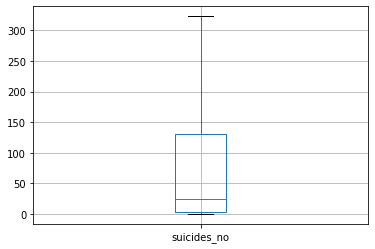

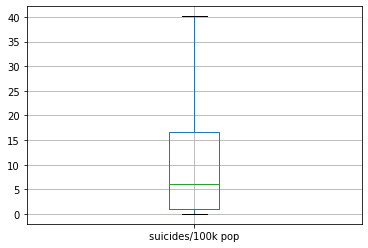

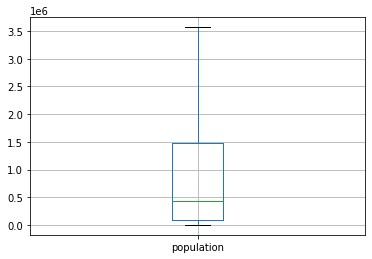

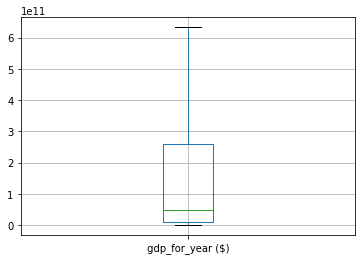

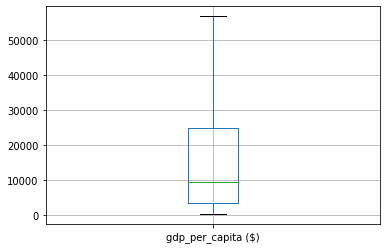

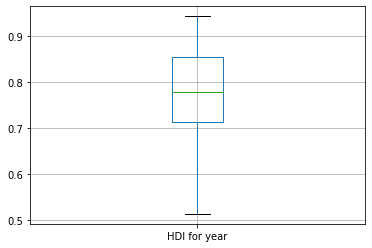

In [15]:
for i in continuous_variables:
  df.boxplot(i,showfliers=False)
  plt.show()

iii. Histograms with too few bins, too many bins and a good amount of bins for each variable

suicides_no


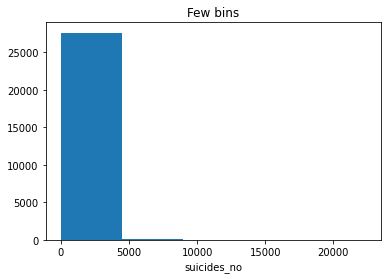

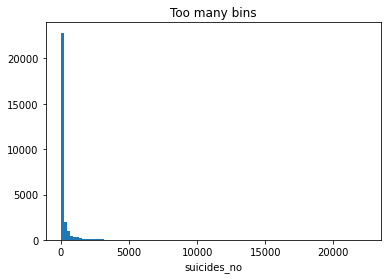

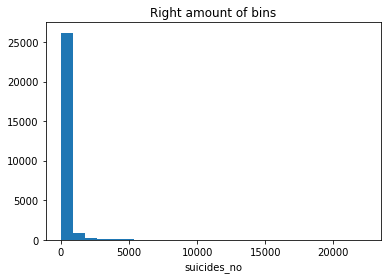

suicides/100k pop


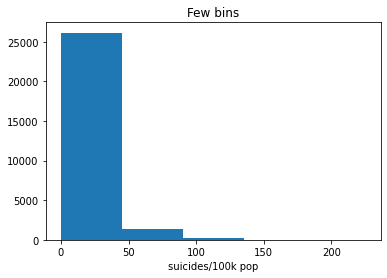

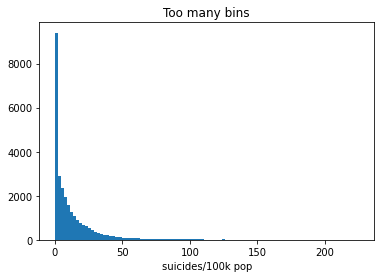

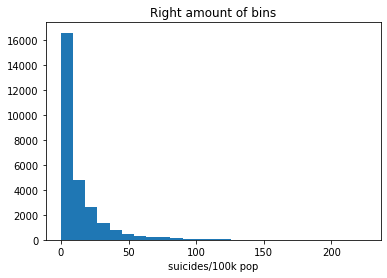

population


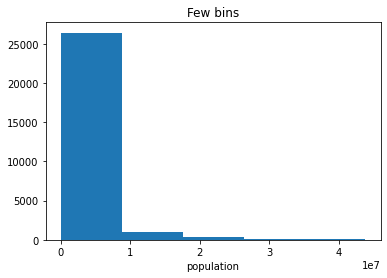

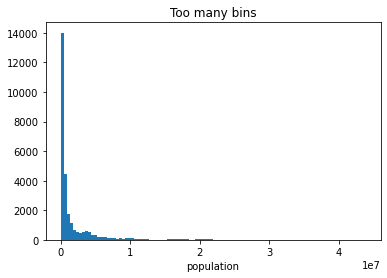

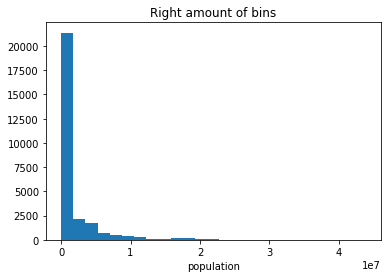

 gdp_for_year ($) 


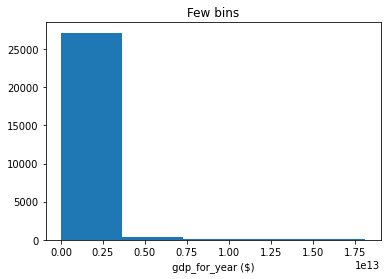

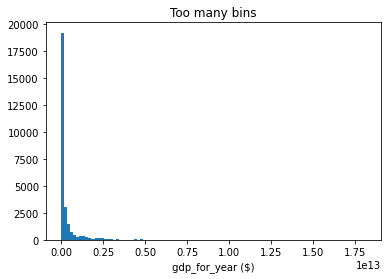

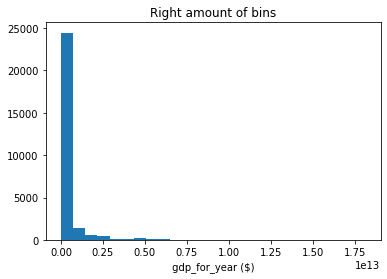

gdp_per_capita ($)


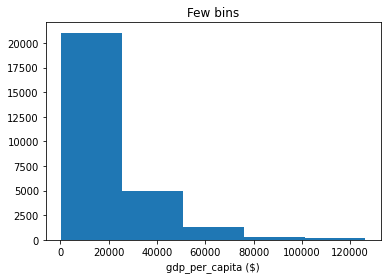

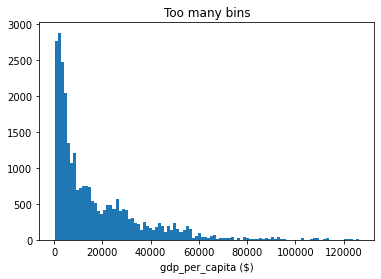

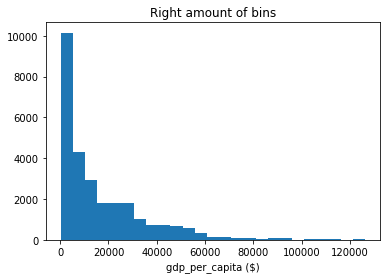

HDI for year


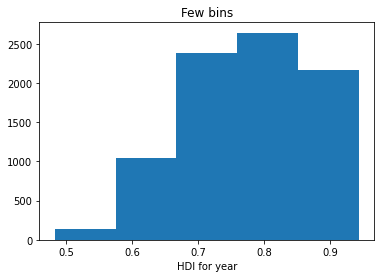

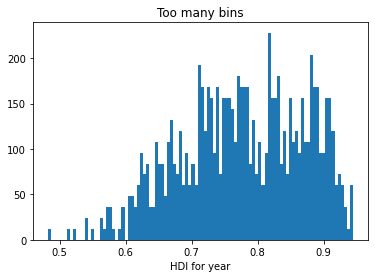

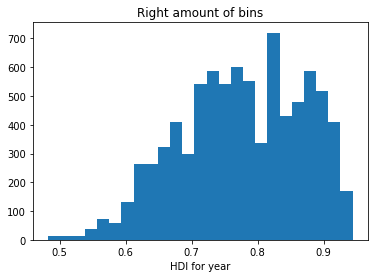

In [16]:
for i in continuous_variables:
  print(i)
  plt.hist(df[i],5)
  plt.title("Few bins")
  plt.xlabel(i)
  plt.show()
  plt.hist(df[i],100)
  plt.title("Too many bins")
  plt.xlabel(i)
  plt.show()
  plt.hist(df[i],25)
  plt.title("Right amount of bins")
  plt.xlabel(i)
  plt.show()

iv. QQ plot for each variable

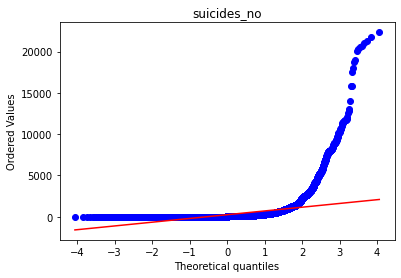

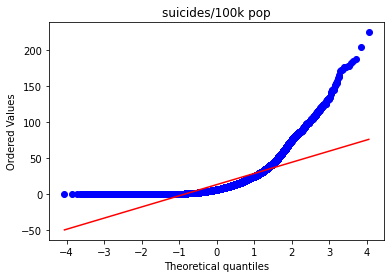

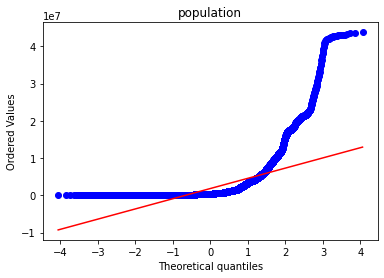

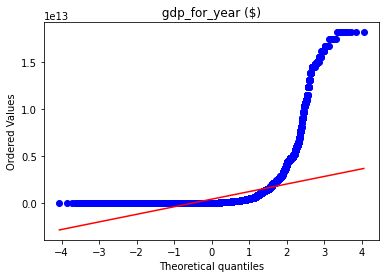

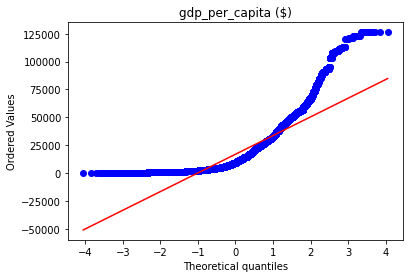

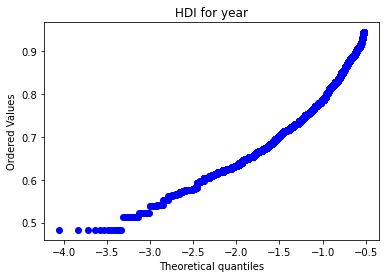

In [17]:
for i in continuous_variables:
  res = stats.probplot(df[i], plot=plt)
  plt.title(i)
  plt.show()

We can observe that :

Skewed right: "suicides_no","suicides/100k pop","population"," gdp_for_year","gdp_per_capita"

Almost uniform(normal) distribution: HDI for year

v. Checking whether each variable deviates is log normal

QQ plots for log of the data of each variable


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


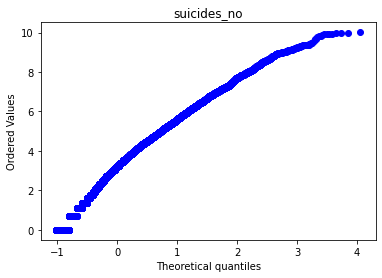

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


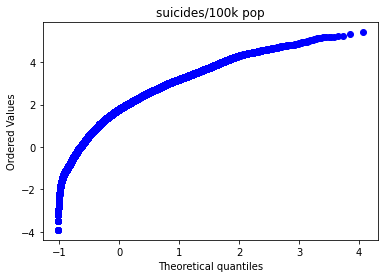

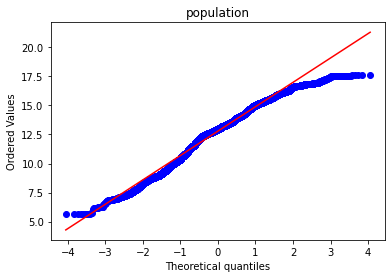

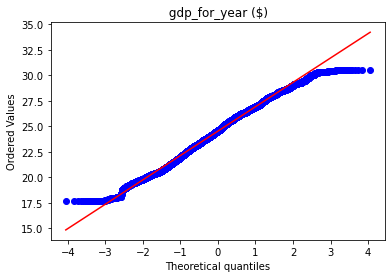

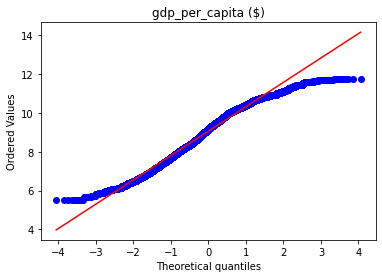

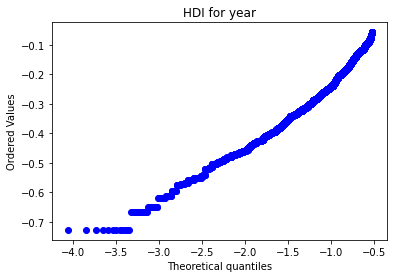

In [18]:
print("QQ plots for log of the data of each variable")
for i in continuous_variables:
  res = stats.probplot(np.log(df[i]), plot=plt)
  plt.title(i)
  plt.show()

We can observe from the QQ plots that:

log-normal deviations: suicides_no, population, gdp_for_year

The other variables can NOT have log-normal deviations

## **d) Pair-wise interaction**

i. Box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

POPULATION VS AGE


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


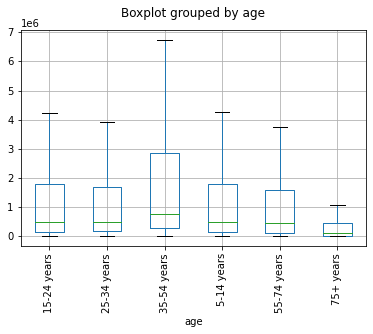

GDP_PER_CAPITA VS GENERATION


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


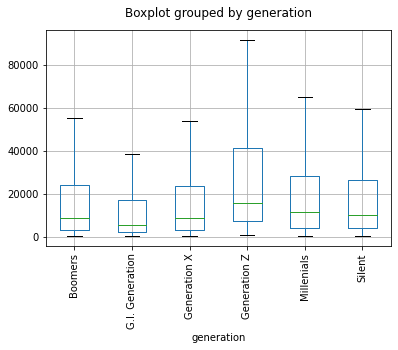

In [19]:
print("POPULATION VS AGE")
df.boxplot(column="population",by="age",showfliers=False,rot=90)
plt.title("")
plt.show()

print("GDP_PER_CAPITA VS GENERATION")
df.boxplot(column="gdp_per_capita ($)",by="generation",showfliers=False,rot=90)
plt.title("")
plt.show()

ii. Heatmap of correlation between all pairs of continuous variables

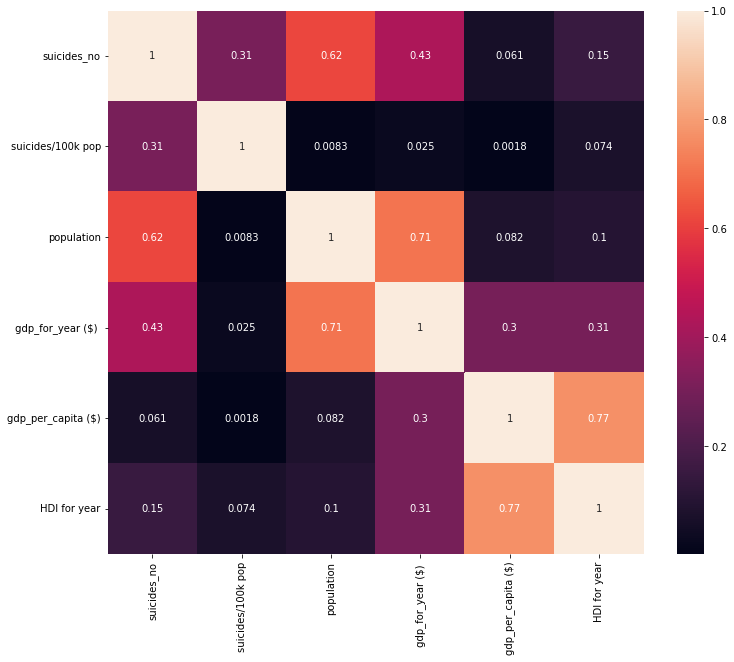

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap( df[continuous_variables].corr(), annot=True)
plt.show()

iii. Creative part: Autocorrelation plot for continuous variables

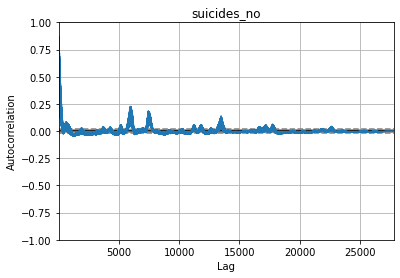

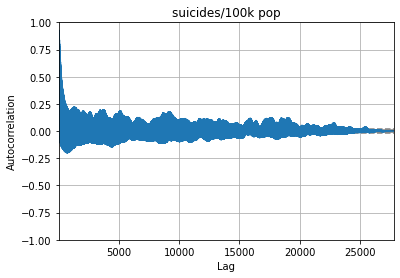

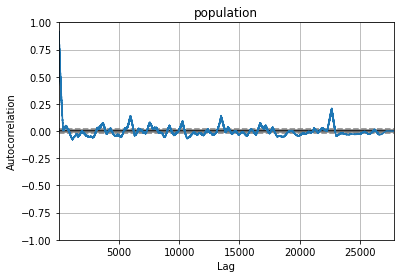

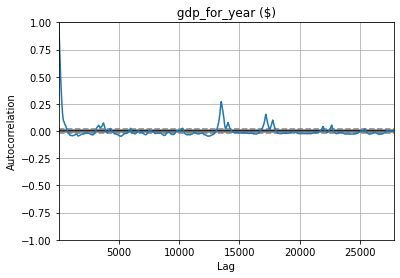

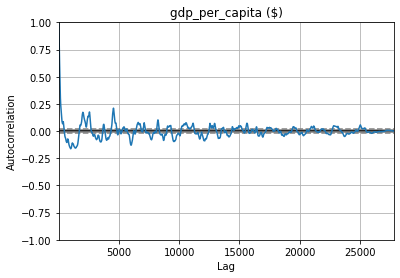

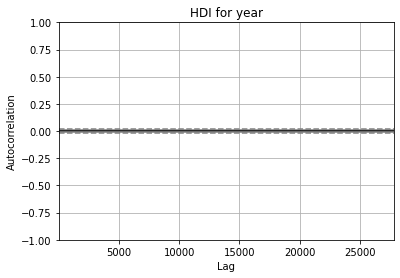

In [21]:
for i in continuous_variables:
  pd.plotting.autocorrelation_plot(df[i])
  plt.title(i)
  plt.show()

Autocorrelation is used to measure the randomness of the data. We compare the values with the values a few readings back(referring to time lag) to get a value for autocorrelation. If the autocorrelation plots have values close to 0 for most values of lag(time delay between the readings), then we can conclude that the data is random. In the given data we can say that the parameters gdp_for_year and HDI for year are almost perfectly random. gdp_per_capita, population and suicides_no have quite a few small deviations in the value of autocorrelation so we can conclude there are a few small patterns in the data and its not completelt random. On the other hand, suicide/100k pop has very high deviations of autocorrelation from 0 and hence it is not random data.

# **Q2**

In [22]:
del df["country-year"] #Redundant info
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,63067077179,2309,Generation Z


### **a. Pick the top six countries by average yearly suicides, and display their suicide for each year separately.**

In [23]:
#for i in df.iterrows():
 # print(i)
def make_new_df(df_x,columns):
  df=pd.DataFrame(columns=columns) 
  for i in df_x.groupby([columns[0],columns[1]])[columns[2]]:
    flag=True
    for j in i[0]:
      if flag:
        var_1=j
        flag=False
      else:
        var_2=j
    suicide_no=i[1].sum()
    df=df.append({columns[0]:var_1,columns[1]:var_2,columns[2]:suicide_no},ignore_index=True)
  return df

df_new =make_new_df(df,["country","year","suicides_no"])
df_new

,country,year,suicides_no
0,Albania,1987,73
1,Albania,1988,63
2,Albania,1989,68
3,Albania,1992,47
4,Albania,1993,73
...,...,...,...
2316,Uzbekistan,2010,1464
2317,Uzbekistan,2011,1640
2318,Uzbekistan,2012,1835
2319,Uzbekistan,2013,1950


This is a newly created dataframe which has the values of total yearly suicide rates of each country every year

In [24]:
top_countries=[]
for i in df_new.groupby("country")["suicides_no"]: #to find the top 6 countrieds
  top_countries.append([i[1].sum()/len(i[1]),i[0]])
top_countries.sort()
top_countries=top_countries[::-1][:6]
for i in range(6):
  top_countries[i]=top_countries[i][1]
top_countries
indexes=[]
ind=0
for i in df_new["country"]: # locating indexes of top six countries in the dataframe
  if i in top_countries:
    indexes.append(ind)
  ind+=1

df_new.iloc[indexes].reset_index()

,index,country,year,suicides_no
0,758,France,1985,12501
1,759,France,1986,12529
2,760,France,1987,12161
3,761,France,1988,11599
4,762,France,1989,11715
...,...,...,...,...
168,2266,United States,2011,39508
169,2267,United States,2012,40596
170,2268,United States,2013,41143
171,2269,United States,2014,42769


Suicide rates for top 6 countries with highest average suicide rates 

### **b. For the same six countries compare the mix of age groups. What does the plot tell you about the differences or similarities by country**

In [25]:
indexes=[]
ind=0
for i in df["country"]: # locating indexes of top six countries in the dataframe
  if i in top_countries:
    indexes.append(ind)
  ind+=1
df_top6 = df.iloc[indexes].reset_index()

df_news=make_new_df(df_top6,columns=["country","age","suicides_no"]) 
df_news

,country,age,suicides_no
0,France,15-24 years,19849
1,France,25-34 years,42510
2,France,35-54 years,123510
3,France,5-14 years,877
4,France,55-74 years,86509
5,France,75+ years,55872
6,Germany,15-24 years,17902
7,Germany,25-34 years,32947
8,Germany,35-54 years,97833
9,Germany,5-14 years,832


This is the data of suicide rates vs age groups for the top 6 countries with highest suicide rates.

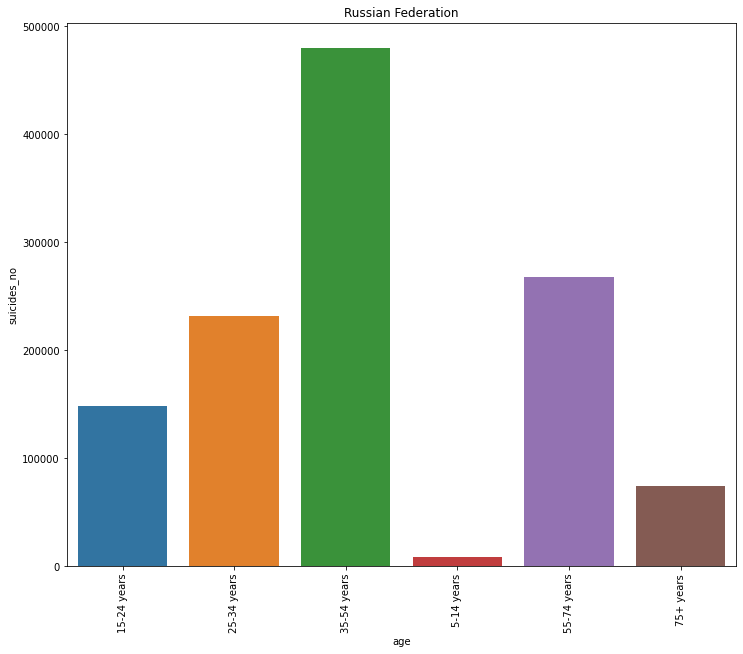

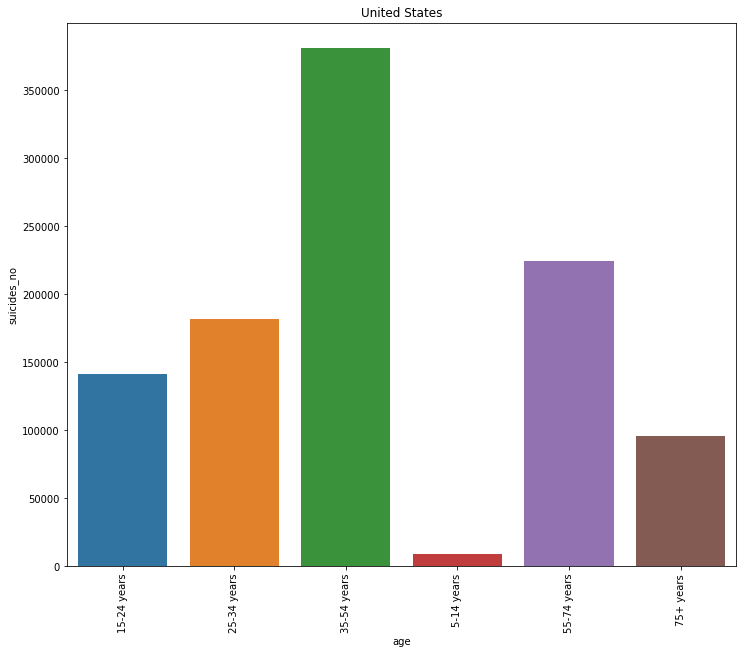

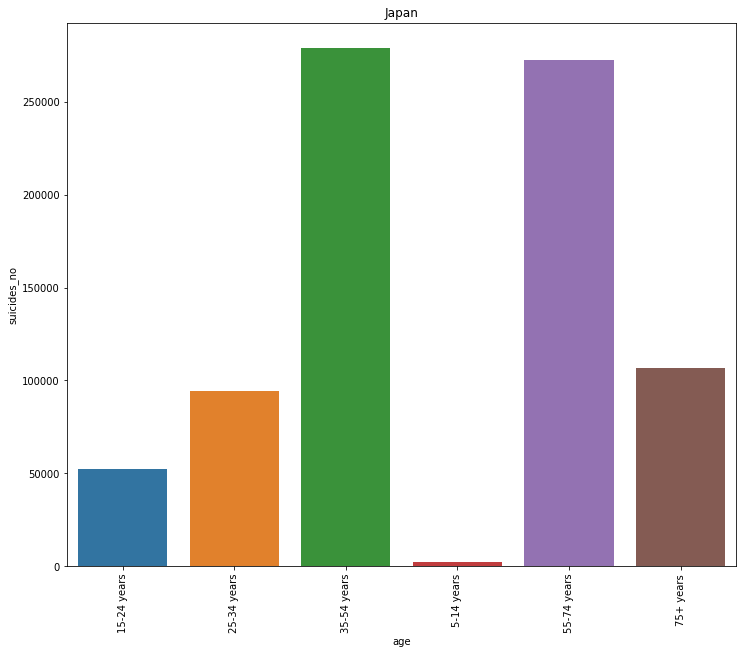

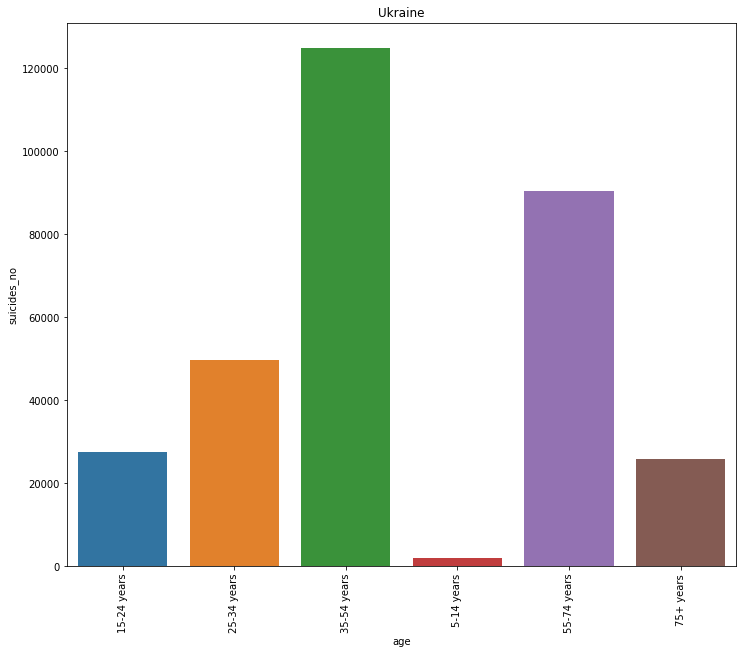

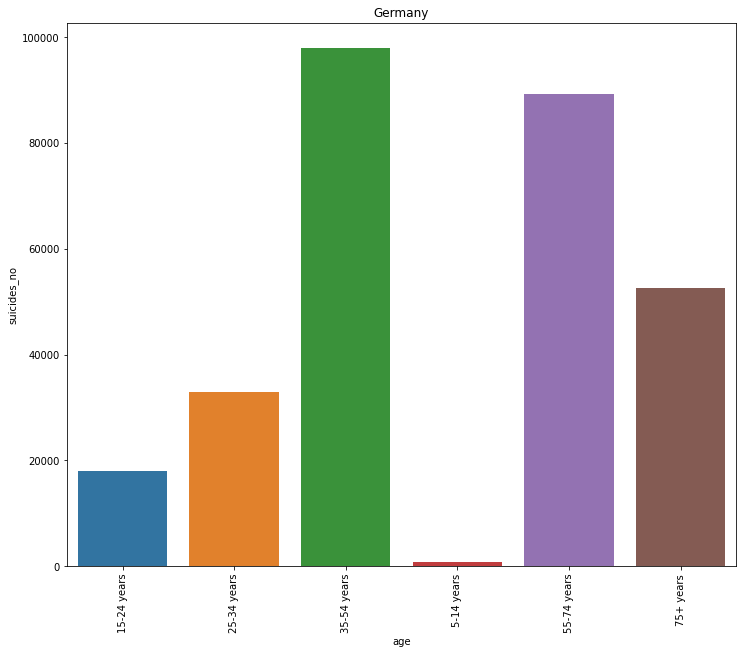

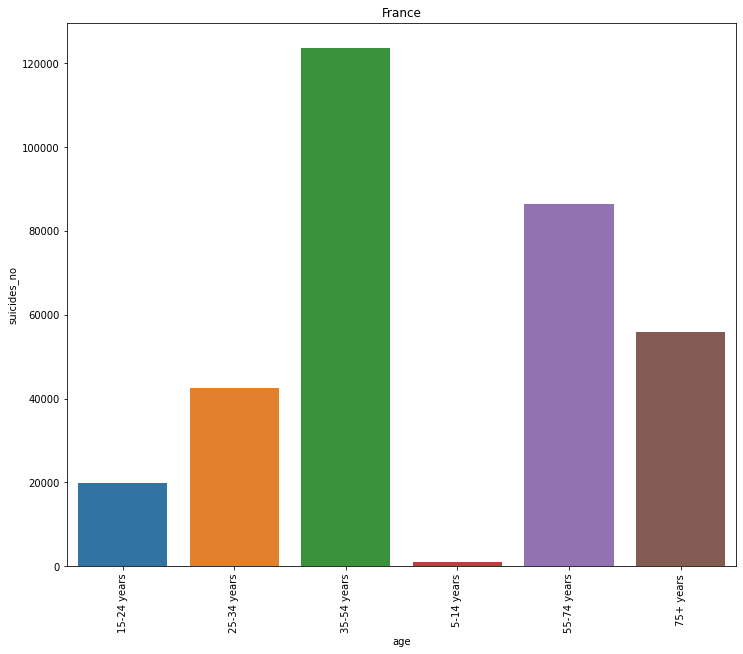

In [26]:
def generate_graph(val,df_n,feature,x,y): # To make plot of suicides vs age grp for each country
  indexes=[]
  ind=0
  for i in df_n[feature]: # locating indexes of value
    if i == val:
      indexes.append(ind)
    ind+=1
  df = df_n.iloc[indexes].reset_index()
  plt.figure(figsize=(12,10))
  sns.barplot(x=df[x],y=df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(val)
  plt.xticks(rotation=90)
  plt.show()

for i in top_countries:
  generate_graph(i,df_news,"country","age","suicides_no")

We can see that all the countries follow a similar pattern with age group 35-54 having most amount of suicides and 5-14 years having least, even the distribution between the age groups is very similar amongst all the 6 countries.

### **c. Plot an appropriate set of graphs or charts that highlight the consistency of difference between males and females when it comes to suicide rates.**

In [27]:
df_gender=make_new_df(df,columns=["age","sex","suicides_no"]) 
df_gender

,age,sex,suicides_no
0,15-24 years,female,175437
1,15-24 years,male,633105
2,25-34 years,female,208823
3,25-34 years,male,915089
4,35-54 years,female,506233
5,35-54 years,male,1945908
6,5-14 years,female,16997
7,5-14 years,male,35267
8,55-74 years,female,430036
9,55-74 years,male,1228407


Dataframe consisting of total suicide rates wrt to gender and age.

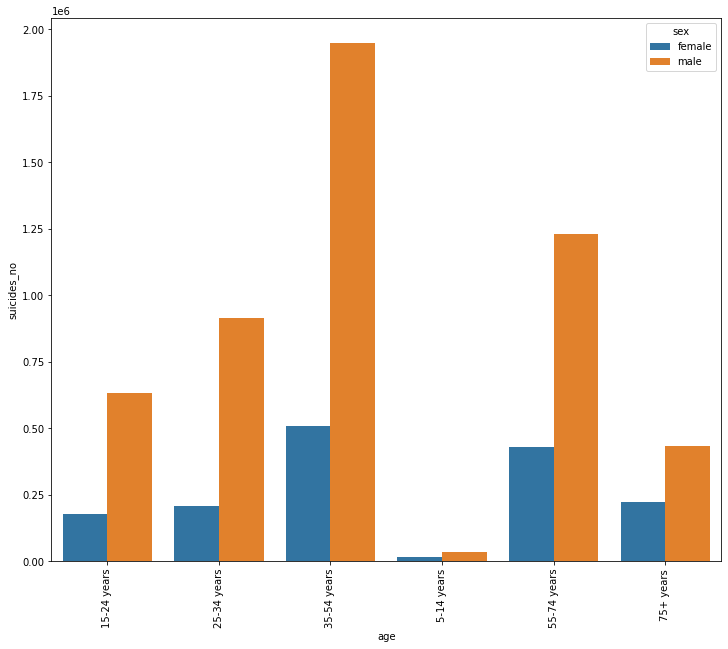

In [28]:
plt.figure(figsize=(12,10))
sns.barplot(x="age",y="suicides_no",hue="sex",data=df_gender)
plt.xlabel("age")
plt.ylabel("suicides_no")
plt.xticks(rotation=90)
plt.show()

Graphs of total no of number of suicides over the years vs age group for males and females.

We can observe that both the graphs follow a very similar pattern with 35-54 years age group having maximum no of suicides and 5-14 having least, we can also observe that no of suicides in male is consistenly higher than the no of suicides in female by a factor between 2 and 4 for all age groups.

### **d. Using an appropriate graph, show the worst year for each generation in the US.**

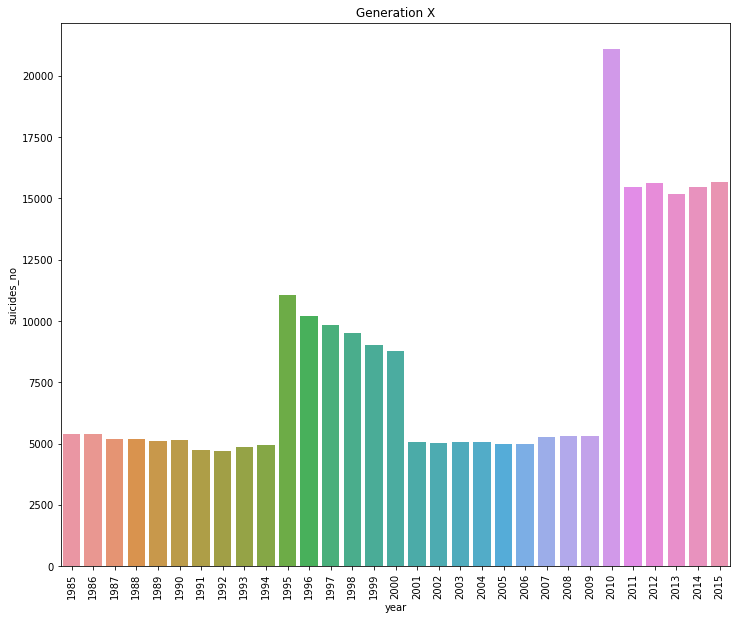

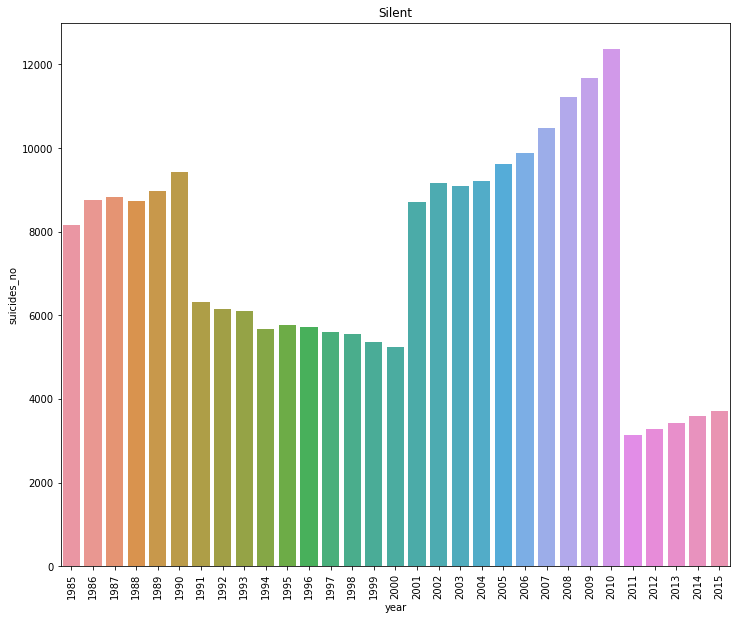

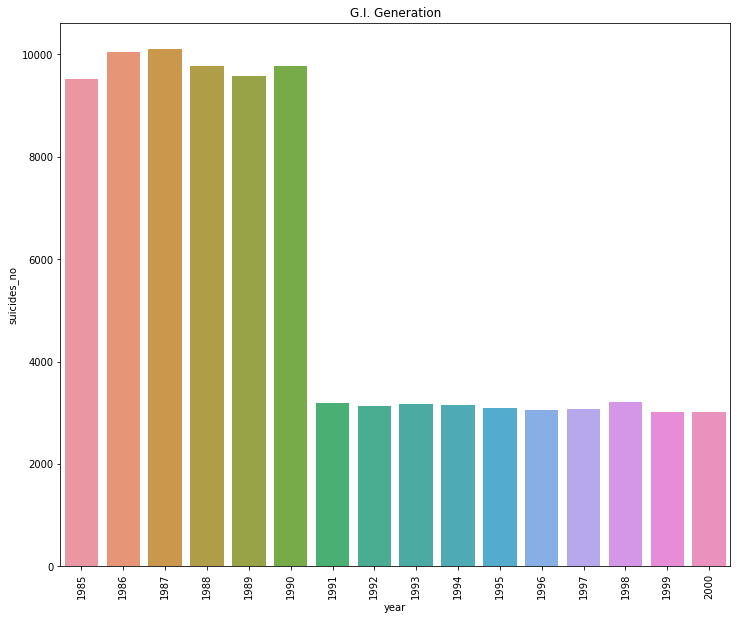

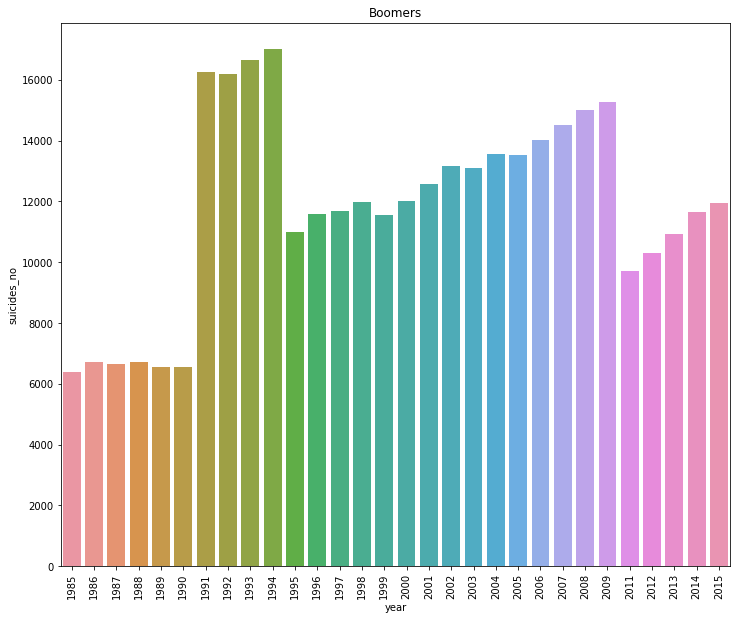

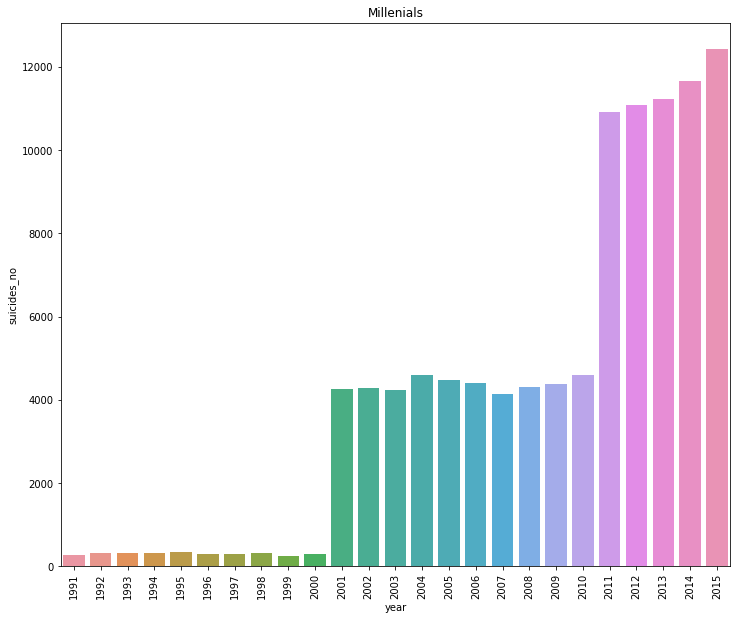

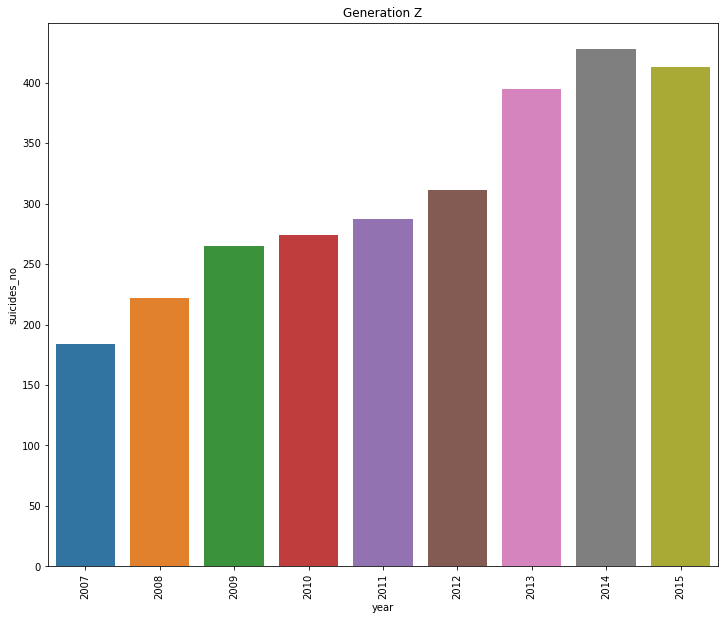

In [29]:
indexes=[]
ind=0
for i in df["country"]: # locating indexes of USA
  if i == "United States":
    indexes.append(ind)
  ind+=1
df_n = df.iloc[indexes].reset_index() #Df with values only from USA
df_generation=make_new_df(df_n,columns=["year","generation","suicides_no"])

generations=pd.unique(df["generation"])
for i in generations:
  generate_graph(i,df_generation,"generation","year","suicides_no")
  

Graphs showing yearly suicide rates for each generaton in US.

We can observe from the graph that the worst years for each generation are:


1. Generation X -> 2010
2. Silent -> 2010
3. G.I Generation -> 1987
4. Boomers -> 1994
5. Millenials -> 2015
6. Generation Z -> 2014

### **e. Plot a bihistogram for a few specific countries (for a year, say 2000) for male and female populations by age ranges to highlight some differences in sex ratios between countries.**

Country: Russian Federation


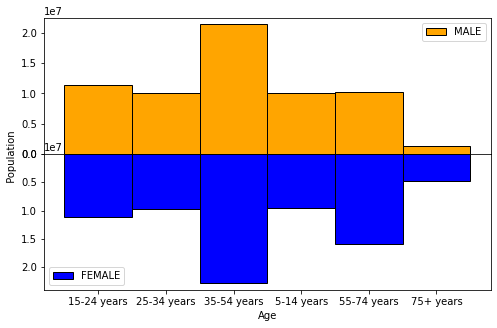

Country: United States


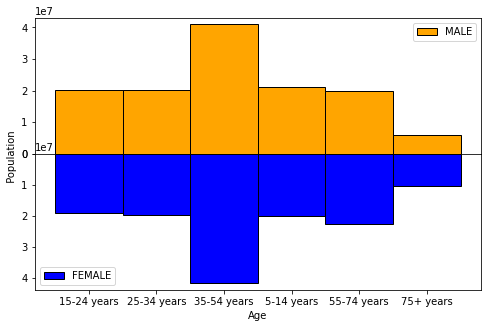

Country: Japan


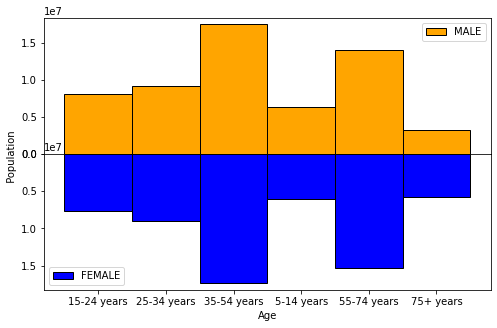

Country: Ukraine


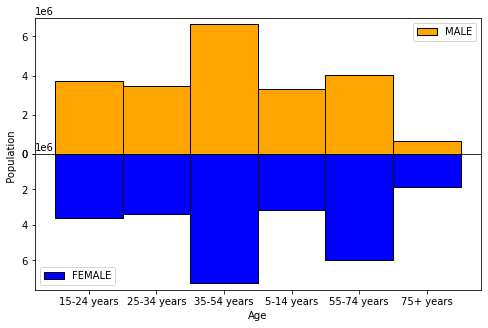

Country: Germany


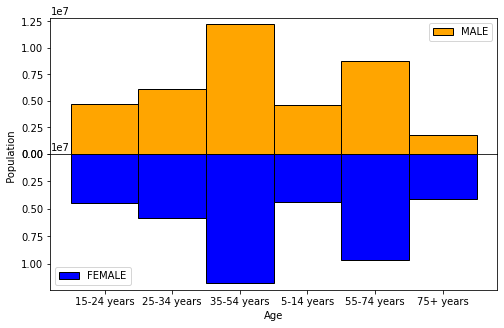

Country: France


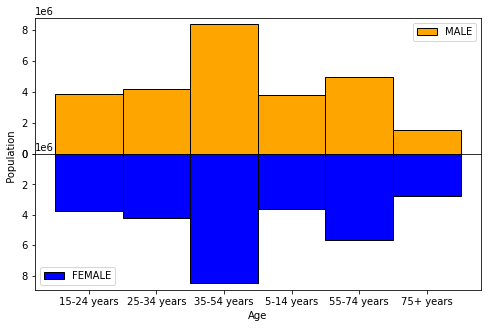

In [30]:
df_pop=df[df["year"]==2000]

for i in top_countries:
  print("Country:",i)

  df_c = make_new_df(df_pop[df_pop["country"]==i],columns=["age","sex","population"])
  df_male = df_c[df_c["sex"]=="male"]
  df_female = df_c[df_c["sex"]=="female"]
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5))

  flag=True

  for ax in axes.ravel():
    if flag:
      ax.bar(df_male["age"],df_male["population"],color='orange',width=1,edgecolor='black')
      ax.legend(["MALE"])
      flag=False
    else:
      ax.bar(df_female["age"],df_female["population"],color='blue',width=1,edgecolor='black')
      ax.invert_yaxis()
      ax.legend(["FEMALE"])

  plt.subplots_adjust(hspace=0)
  plt.xlabel("Age")
  plt.ylabel("                                          Population")
  plt.show()
  

These dataframes represent bihistograms with total male and female population of few selected countries for the year 2000.

We can observe that for most age groups, male and female population is almost equal apart from the age group of 75+, where female population is more than the male population in almost all the countries.

### **f. Show a bubble plot to show the relation between suicide rates, human development index (HDI), and population.**

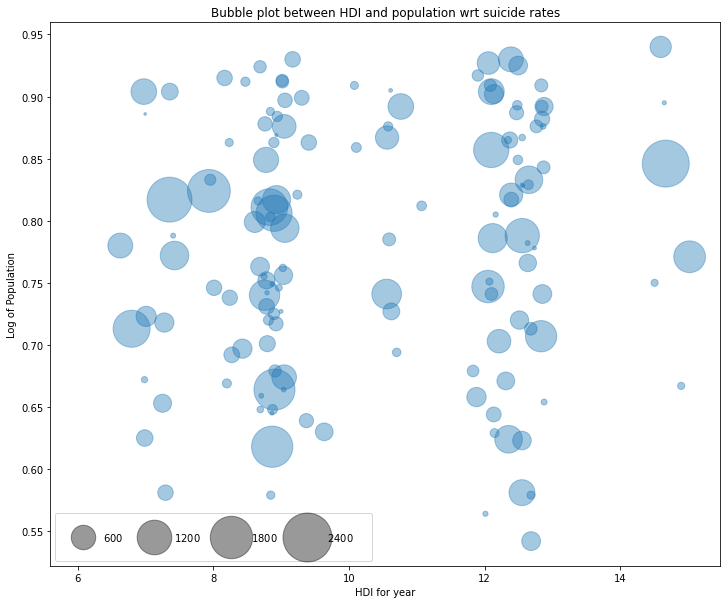

In [31]:
plt.figure(figsize=(12,10))
df = df.reindex(np.random.permutation(df.index))
df_temp = df.iloc[:600,:].copy()
df_temp = df_temp.reset_index(drop=True)
df_temp["population"]=np.log(df["population"])
ax = plt.scatter(df_temp["population"], df_temp["HDI for year"],df_temp["suicides/100k pop"]*25,alpha=0.4)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=4, frameon=True, handlelength=2, borderpad = 1.8, handletextpad=1)
plt.xlabel("HDI for year")
plt.ylabel("Log of Population")
plt.title("Bubble plot between HDI and population wrt suicide rates")
plt.show()

Bubble plot between HDI, population and suicide rates. 

We can observe that for populations with higher HDI, the suicide rates are also more. This observation of higher suicide rates in developed countries rather than less developed countries is interesting.